# Stack Overflow Developer Survey 2017: Salary Analysis


This analysis focuses on developer salary distribution in the United States, based on gender, job titles, education level, and satisfaction rates. The goal is to uncover insights into salary disparities, job satisfaction, and career dynamics in the tech industry.
    

## Business Understanding


The tech industry plays a pivotal role in driving innovation and economic growth, with developers at the forefront of this transformation. Within this dynamic field, one of the ongoing discussions revolves around gender diversity, particularly the underrepresentation of women in technical roles. Understanding salary differences between male and female developers can shed light on potential gender gaps in compensation and provide insights into equality within the industry.

Additionally, education is often viewed as a key factor influencing career trajectory and salary. It is important to explore how educational background correlates with job titles and whether higher education levels lead to higher salaries for developers. The analysis also aims to examine satisfaction rates for both career and current job roles, providing a holistic view of how fulfilled developers feel in their professional journeys.
    

## Research Questions


1. How does developer salary vary across different job titles (DeveloperType) in the United States?
2. Are there significant salary differences between Male and Female developers across job titles in the United States?
3. How does education level impact developer salary in the United States?
4. Is there a relationship between salary and job satisfaction for Male and Female developers?
    

## Data Understanding


The dataset used for this analysis is derived from the Stack Overflow Developer Survey 2017, a comprehensive survey aimed at understanding the perspectives and experiences of developers worldwide. The dataset includes a wealth of information, ranging from demographics, education, employment, and job titles, to more specific data such as salary, job satisfaction, and career satisfaction. The focus will be on respondents based in the United States who identify as Male or Female, prioritizing the ***DeveloperType*** column for job titles. If ***DeveloperType*** is missing, the ***NonDeveloperType*** column will be used. The dataset contains 154 columns and over 50,000 entries, but only key variables such as salary, gender, education level, job title, and satisfaction rates (job and career) will be included in this analysis.
    

In [244]:

# Displaying the first few rows of the dataset
import pandas as pd
import locale
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

def plot_salary_comparison(data, x_col, y_col, hue_col=None, title='', xlabel='', ylabel='', palette='colorblind', figsize=(10, 8)):
    """
    Creates a bar plot comparing salary or other metrics, excluding rows with missing Salary,
    using a color-blind-friendly palette and distinct colors for each category.
    
    Parameters:
    - data: DataFrame containing the data to plot.
    - x_col: The column for the x-axis (e.g., 'Salary').
    - y_col: The column for the y-axis (e.g., 'JobTitle', 'FormalEducation').
    - hue_col: Optional column to group by different categories (e.g., 'Gender').
    - title: The title of the plot (Optional).
    - xlabel: Label for the x-axis (Optional).
    - ylabel: Label for the y-axis (Optional).
    - palette: Color palette to use for the plot (default is 'colorblind' for accessibility).
    - figsize: Size of the figure (Optional).
    
    Returns:
    - A bar plot with distinct colors for each category or by hue grouping.
    """
    # Drop rows where Salary is NaN
    data_cleaned = data.dropna(subset=[x_col])
    
    # Set up the plot with distinct colors for each category
    plt.figure(figsize=figsize)
    
    # If hue_col is provided, use it to differentiate groups
    if hue_col:
        sns.barplot(x=x_col, y=y_col, hue=hue_col, data=data_cleaned, palette=palette)
    else:
        sns.barplot(x=x_col, y=y_col, data=data_cleaned, palette=sns.color_palette(palette, len(data_cleaned)))
    
    # Add labels and title
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    
def plot_salary_vs_satisfaction(data, title='', xlabel='Salary (USD)', ylabel='Job Satisfaction', hue_col='Gender', palette='colorblind', figsize=(10, 8)):
    """
    Creates a scatter plot to show the relationship between salary and job satisfaction by gender,
    using a color-blind-friendly palette.
    
    Parameters:
    - data: DataFrame containing the data to plot.
    - title: The title of the plot (Optional).
    - xlabel: Label for the x-axis (Optional).
    - ylabel: Label for the y-axis (Optional).
    - hue_col: The column to differentiate groups by color (e.g., 'Gender').
    - palette: Color palette to use for the plot (Optional, default is 'colorblind' for accessibility).
    - figsize: Size of the figure (Optional).
    
    Returns:
    - A scatter plot visualizing the relationship between salary and job satisfaction.
    """
    plt.figure(figsize=figsize)
    
    # Create the scatter plot with hue to differentiate Male and Female using color-blind-friendly palette
    sns.scatterplot(x='Salary', y='JobSatisfaction', hue=hue_col, data=data, palette=palette, alpha=0.7)
    
    # Add labels and title
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

def format_and_sort_salary(df, sort_by=None, ascending=False):
    """
    Format salary-related columns as dollars and sort by a specified column. Works for both summary statistics
    (like mean, min, max) or individual salary columns, excluding rows with NaN values.
    
    Parameters:
    df (DataFrame): The DataFrame with salary statistics.
    sort_by (list or str): The columns to sort by (e.g., ['mean', 'Salary']).
    ascending (bool or list): Whether to sort ascending (default is False for descending order).
    
    Returns:
    DataFrame: The formatted and sorted DataFrame.
    """
    # Reset the index if it's a multi-level index (e.g., after describe())
    if isinstance(df.index, pd.MultiIndex):
        df = df.reset_index()

    # If no sorting column is provided, default to 'mean' or 'Salary' if 'mean' doesn't exist
    if sort_by is None:
        sort_by = 'mean' if 'mean' in df.columns else 'Salary'

    # Drop rows where the sorting column is NaN (handle each column in sort_by list)
    if isinstance(sort_by, list):
        df_cleaned = df.dropna(subset=sort_by)
    else:
        df_cleaned = df.dropna(subset=[sort_by])
    
    # Sort the DataFrame by the specified column(s)
    df_sorted = df_cleaned.sort_values(by=sort_by, ascending=ascending)
    
    # Apply currency formatting to salary-related columns, handle NaN
    salary_columns = ['mean', 'min', 'max', '25%', '50%', '75%', 'Salary']
    for col in salary_columns:
        if col in df_sorted.columns:
            df_sorted[col] = df_sorted[col].apply(lambda x: locale.currency(x, grouping=True) if pd.notnull(x) else x)
    
    return df_sorted


# Load the dataset
survey_data = pd.read_csv('survey_results_public.csv')
survey_data.head()
    

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:

# Finding the number of rows and columns
rows, columns = survey_data.shape
print(f'The dataset contains {rows} rows and {columns} columns.')
    

The dataset contains 51392 rows and 154 columns.


In [246]:

# Listing all columns horizontally
columns_list = list(survey_data.columns)
print(columns_list)
    

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '


With 154 columns, not all of them will be included in the analysis. We will focus on key variables like salary, gender, education level, job titles, and satisfaction rates (job and career).
    

## Data Preparation


To ensure the dataset is ready for analysis, the following data cleaning steps are performed:
- Rows with missing salary data are dropped.
- Only respondents from the United States and who identify as Male or Female are included.
- The **DeveloperType** column is prioritized for job titles, and **NonDeveloperType** is used if **DeveloperType** is missing. If both are missing, the entry is excluded, and the reason for exclusion (employment status, salary) is noted.
    

In [247]:

# Data cleaning and preparation
# Filter for U.S. respondents and Male/Female gender, and create a copy
salary_data_us = survey_data[(survey_data['Country'] == 'United States') & (survey_data['Gender'].isin(['Male', 'Female']))].copy()

# Prioritize DeveloperType, use NonDeveloperType if missing, using .loc to avoid the warning
salary_data_us.loc[:, 'JobTitle'] = salary_data_us['DeveloperType'].fillna(salary_data_us['NonDeveloperType'])

# If the job title contains multiple titles separated by a semicolon, take only the first one
salary_data_us['JobTitle'] = salary_data_us['JobTitle'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)

# Exclude entries with no job title or no salary
excluded_data = salary_data_us[salary_data_us['JobTitle'].isnull() | salary_data_us['Salary'].isnull()]
excluded_data = excluded_data[['EmploymentStatus', 'Salary']]

# Group the excluded data by EmploymentStatus, count rows, and display missing salary info
excluded_grouped = excluded_data.groupby(['EmploymentStatus']).agg(
    count=('Salary', 'size'), 
    missing_salary=('Salary', lambda x: x.isna().sum())
).reset_index()

# Sort by 'count' in descending order
excluded_grouped = excluded_grouped.sort_values(by='count', ascending=False)

# Display the grouped excluded data and cleaned data

# Display excluded data grouped by EmploymentStatus with missing salary count
print("**Excluded Data Grouped by Employment Status and Missing Salary**")
display(excluded_grouped)

# Display cleaned data
print("\n**Cleaned Data**")
display(salary_data_us.head())
    

**Excluded Data Grouped by Employment Status and Missing Salary**


,EmploymentStatus,count,missing_salary
0,Employed full-time,3276,3275
3,"Independent contractor, freelancer, or self-em...",558,558
5,"Not employed, but looking for work",327,327
1,Employed part-time,322,322
4,"Not employed, and not looking for work",303,303
2,I prefer not to say,75,75
6,Retired,38,38



**Cleaned Data**


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,JobTitle
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,Data scientist
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,Data scientist
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN,Other
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN,Desktop applications developer


#### Excluded Data

The excluded data consists of respondents who lacked valid job titles in both the DeveloperType and NonDeveloperType columns, or who did not provide salary data. These entries were removed from the analysis because having a job title and salary is crucial for understanding salary distributions. The excluded respondents include those who were unemployed, either not looking for work or actively seeking employment, as well as independent contractors. Most of these entries also had missing salary data, further justifying their exclusion from the salary-based analysis.

#### Cleaned Data

The cleaned data includes respondents from the United States who identified as Male or Female and provided valid job titles. This dataset will be the foundation for exploring relationships between job titles, salary, education, and satisfaction rates. The entries show a diverse range of professional backgrounds, including full-time employees and freelancers, with varying levels of education, from bachelor’s degrees to doctorates. This cleaned subset provides the necessary data to carry out meaningful analysis of salary trends and job satisfaction among developers.

## Evaluation

### Research Question 1: How does developer salary vary across different job titles?

In [248]:

# Group by JobTitle and calculate the mean salary for each title
salary_by_job_title = salary_data_us.groupby('JobTitle')['Salary'].mean().reset_index()

# Sort by salary to display highest to lowest
salary_by_job_title_sorted = format_and_sort_salary(salary_by_job_title, sort_by='Salary', ascending=False)

# Display the formatted and sorted DataFrame
salary_by_job_title_sorted
    

,JobTitle,Salary
16,Other,"$112,854.69"
7,Developer with a statistics or mathematics bac...,"$107,999.16"
15,Mobile developer,"$107,490.54"
13,Machine learning specialist,"$105,672.94"
3,Database administrator,"$105,655.00"
6,DevOps specialist,"$104,698.28"
19,Systems administrator,"$100,550.00"
10,Embedded applications/devices developer,"$100,063.46"
11,Graphic designer,"$100,000.00"
2,Data scientist,"$97,938.52"


The results provide a comprehensive breakdown of salary statistics across various job titles for developers in the United States.The average salary for each job title is shown in the column; the salary range is indicated in the ***min*** and ***max*** columns from the lowest to highest reported amounts.In addition, to that the ***25%***, ***50%*** and ***75 %*** columns represent salary percentiles the information they provide sheds light on how pay is distributed across various roles. For example developers who have a foundation in statistics or mathematics earn around 108,000 on average with half of them making between 80,875 and 130,000. Likewise the pay scale for Mobile developers varies widely ranging from 165 to high as 197000 possibly due to variations, in experience or job duties. 

Web developers make up the group in the survey with 2,478 participants but their average pay is a bit lower compared to others at about 94,000 The pay tends to be higher for specialized roles, like ***Machine Learning Specialists*** and ***DevOps Specialists*** which reflects the increasing demand and technical expertise needed for these positions. The results also highlight the significance of expertise in fields; positions related to new or specialized technologies like ***Embedded Applications Developer*** can earn salaries reaching, up to 184,000. 


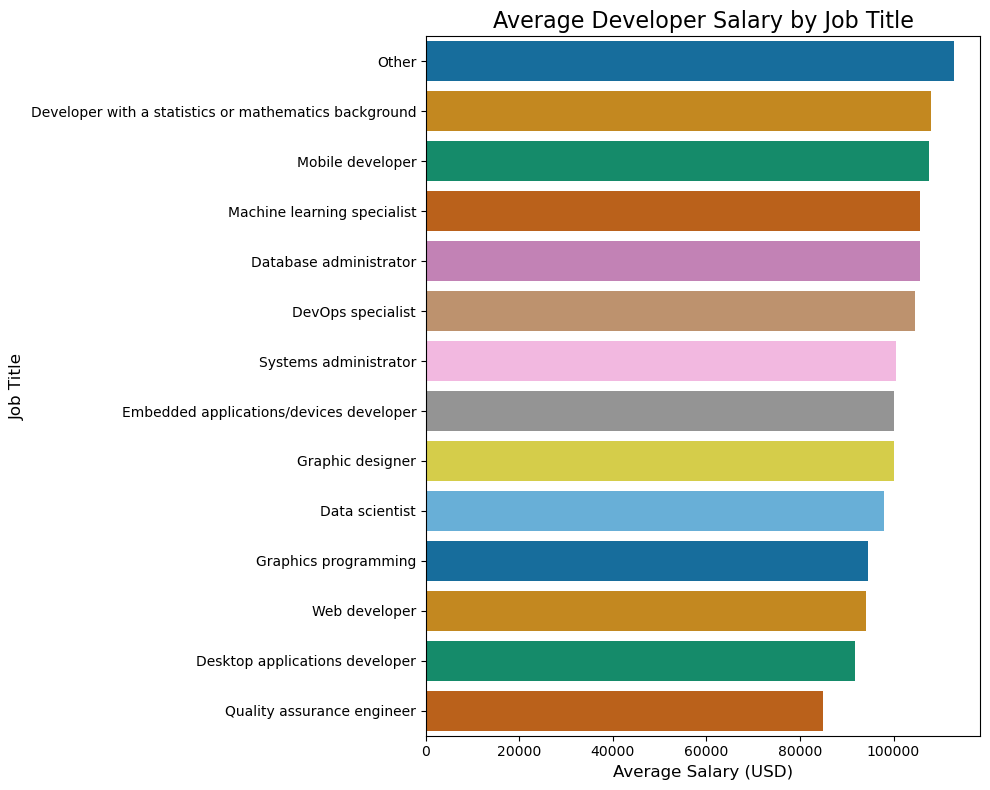

In [249]:
# Group by JobTitle and calculate the mean salary for each title
salary_by_job_title = salary_data_us.groupby('JobTitle')['Salary'].mean().reset_index()

# Sort by salary to display highest to lowest
salary_by_job_title_sorted = salary_by_job_title.sort_values(by='Salary', ascending=False)

# Use the plot function (excluding titles with no salary)
plot_salary_comparison(salary_by_job_title_sorted, x_col='Salary', y_col='JobTitle', title='Average Developer Salary by Job Title', xlabel='Average Salary (USD)', ylabel='Job Title')

### Research Question 2: Are there significant salary differences between Male and Female developers across job titles?

In [250]:

# Analyze salary differences by gender across job titles
salary_by_gender_job = salary_data_us.groupby(['JobTitle', 'Gender'])['Salary'].describe()

# Reset the index to bring 'JobTitle' and 'Gender' back as columns
salary_by_gender_job = salary_by_gender_job.reset_index()

# Use the function to sort and format by 'mean' salary
salary_by_gender_job_sorted = format_and_sort_salary(salary_by_gender_job, sort_by='mean', ascending=False)

# Display the formatted and sorted DataFrame
salary_by_gender_job_sorted
    

,JobTitle,Gender,count,mean,std,min,25%,50%,75%,max
12,DevOps specialist,Female,4.0,"$124,750.00",16740.669043,"$105,000.00","$116,250.00","$124,500.00","$133,000.00","$145,000.00"
24,Machine learning specialist,Female,7.0,"$118,017.14",38819.780917,"$70,000.00","$86,000.00","$120,000.00","$147,060.00","$170,000.00"
31,Other,Male,130.0,"$114,545.43",31946.113947,"$30,000.00","$95,000.00","$115,000.00","$140,000.00","$185,000.00"
28,Mobile developer,Female,14.0,"$111,865.71",38368.979801,"$50,000.00","$75,780.00","$117,500.00","$149,750.00","$158,000.00"
7,Database administrator,Male,18.0,"$110,005.56",38094.008672,"$45,000.00","$87,750.00","$107,500.00","$135,000.00","$178,000.00"
15,Developer with a statistics or mathematics bac...,Male,87.0,"$108,700.76",36034.134991,"$24,000.00","$83,500.00","$107,000.00","$139,000.00","$188,000.00"
29,Mobile developer,Male,142.0,"$107,059.19",37796.292956,$165.00,"$83,500.00","$106,700.00","$134,750.00","$197,000.00"
37,Systems administrator,Male,11.0,"$107,013.64",53126.189826,$150.00,"$68,500.00","$110,000.00","$148,500.00","$173,000.00"
25,Machine learning specialist,Male,44.0,"$103,709.09",33118.489308,"$7,800.00","$81,500.00","$104,700.00","$126,250.00","$160,000.00"
14,Developer with a statistics or mathematics bac...,Female,11.0,"$102,450.18",29811.003679,"$70,000.00","$80,000.00","$95,000.00","$113,450.00","$172,000.00"


The results provide a detailed analysis of salary distributions across various job titles, broken down by gender. This allows for a closer look at how compensation differs between male and female respondents within each role. For example, in the ***Data Scientist*** role, males earn an average of 98,509, while females earn a lower average salary of 91,375. Similarly, male ***DevOps Specialists*** have an average salary of 101,490, whereas their female counterparts earn a significantly higher average of 124,750. These differences could be attributed to factors such as experience, geographical location, or specific job responsibilities within these roles.

Additionally, certain job titles like ***Desktop Applications Developer*** show a substantial gap in average salary, with males earning 93,132 compared to 73,023 for females. This gap may reflect deeper systemic issues or differences in negotiation, work experience, or representation within that field. Interestingly, some job titles like ***Graphics Programming*** have almost identical salaries between genders, with both males and females earning about 93,000. This could indicate more equal representation or similar experience levels across genders in that field. Overall, these results highlight the existing disparities between male and female developers, emphasizing the need for further investigation into factors that contribute to these differences.

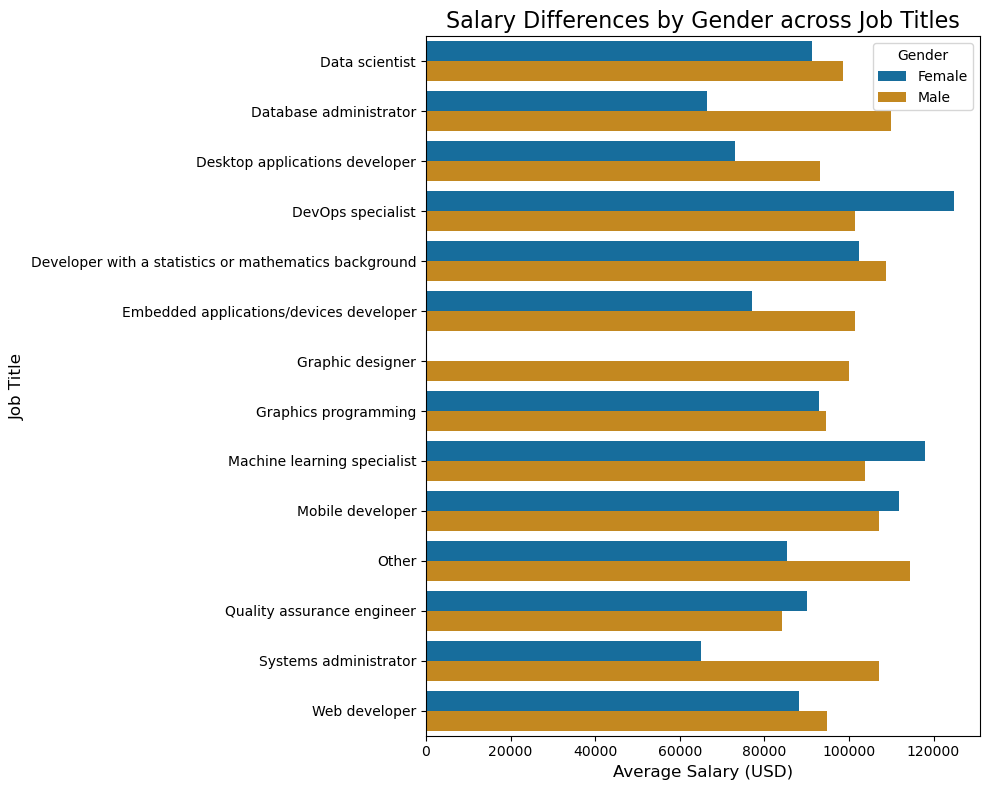

In [251]:
# Group by JobTitle and Gender to calculate mean salary
salary_by_gender_job = salary_data_us.groupby(['JobTitle', 'Gender'])['Salary'].mean().reset_index()

# Use the function with 'Gender' as the hue and color-blind-friendly palette
plot_salary_comparison(salary_by_gender_job, 
                       x_col='Salary', 
                       y_col='JobTitle', 
                       hue_col='Gender', 
                       title='Salary Differences by Gender across Job Titles', 
                       xlabel='Average Salary (USD)', 
                       ylabel='Job Title', 
                       palette='colorblind')

This bar chart compares **salary differences by gender** across various **job titles** in the tech industry. In most job categories, Male developers (shown in gold) earn higher average salaries than Female developers (shown in blue), with notable gaps in roles like **Database administrator**, **Systems administrator**, and **Mobile developer**. However, in specific job titles such as **DevOps specialist** and **Machine learning specialist**, Female developers report higher average salaries than their Male counterparts. These variations suggest that while a gender pay gap persists across many roles, there are some positions where Female developers achieve higher compensation, highlighting the complexity of salary dynamics in the industry.

### Research Question 3: How does education level impact developer salary?

In [252]:

# Analyze the impact of education level on salary
salary_by_education = salary_data_us.groupby('FormalEducation')['Salary'].describe()

# Use the format_and_sort_salary function to sort by mean and apply currency formatting
salary_by_education_sorted = format_and_sort_salary(salary_by_education, sort_by='mean', ascending=False)

# Display the formatted and sorted DataFrame
salary_by_education_sorted
    

,count,mean,std,min,25%,50%,75%,max
FormalEducation,,,,,,,,
I prefer not to answer,2.0,"$144,000.00",50911.688245,"$108,000.00","$126,000.00","$144,000.00","$162,000.00","$180,000.00"
Doctoral degree,79.0,"$120,947.57",35216.642119,"$42,500.00","$100,000.00","$123,000.00","$150,000.00","$197,000.00"
I never completed any formal education,7.0,"$118,071.43",40158.465869,"$70,000.00","$93,250.00","$100,000.00","$142,500.00","$185,000.00"
Master's degree,562.0,"$109,009.04",33175.402648,$70.00,"$86,400.00","$110,000.00","$132,500.00","$194,000.00"
Professional degree,11.0,"$105,636.36",33646.018270,"$50,000.00","$91,000.00","$99,000.00","$129,500.00","$160,000.00"
Bachelor's degree,2048.0,"$93,992.76",32722.124626,$80.00,"$70,000.00","$90,000.00","$115,000.00","$195,000.00"
Some college/university study without earning a bachelor's degree,595.0,"$90,814.02",38296.204131,$147.00,"$62,250.00","$90,000.00","$116,650.00","$190,000.00"
Primary/elementary school,15.0,"$88,267.13",42308.136372,$7.00,"$62,500.00","$92,000.00","$115,000.00","$155,000.00"
Secondary school,77.0,"$79,712.83",38828.510212,"$15,000.00","$50,000.00","$72,000.00","$105,000.00","$170,000.00"


The results illustrate how education level impacts salary distribution among developers in the United States. As expected, those with higher education degrees tend to earn higher average salaries. For instance, individuals holding ***Doctoral degrees*** earn an average salary of 120,947, with the top 25% earning 150,000 or more. Meanwhile, those with ***Master’s degrees*** report an average salary of 109,009. Interestingly, the data reveals that individuals who “prefer not to answer” regarding their education level have the highest average salary, at 144,000, although this group consists of only two respondents and may not be representative.

On the other hand, individuals with ***Bachelor’s degrees*** have an average salary of around 93,992, indicating a solid earning potential even without an advanced degree. Meanwhile, those with lower levels of formal education, such as ***Secondary school and Primary/elementary school***, earn lower salaries, averaging 79,712 and 88,267, respectively. However, it’s worth noting that some respondents who never completed formal education still report impressive earnings, with an average salary of 118,071, suggesting that in the tech industry, skills and experience can often outweigh formal education credentials when it comes to compensation. This data highlights the varied paths to success within the tech field and how education can play a role in shaping career trajectories and salary potential.

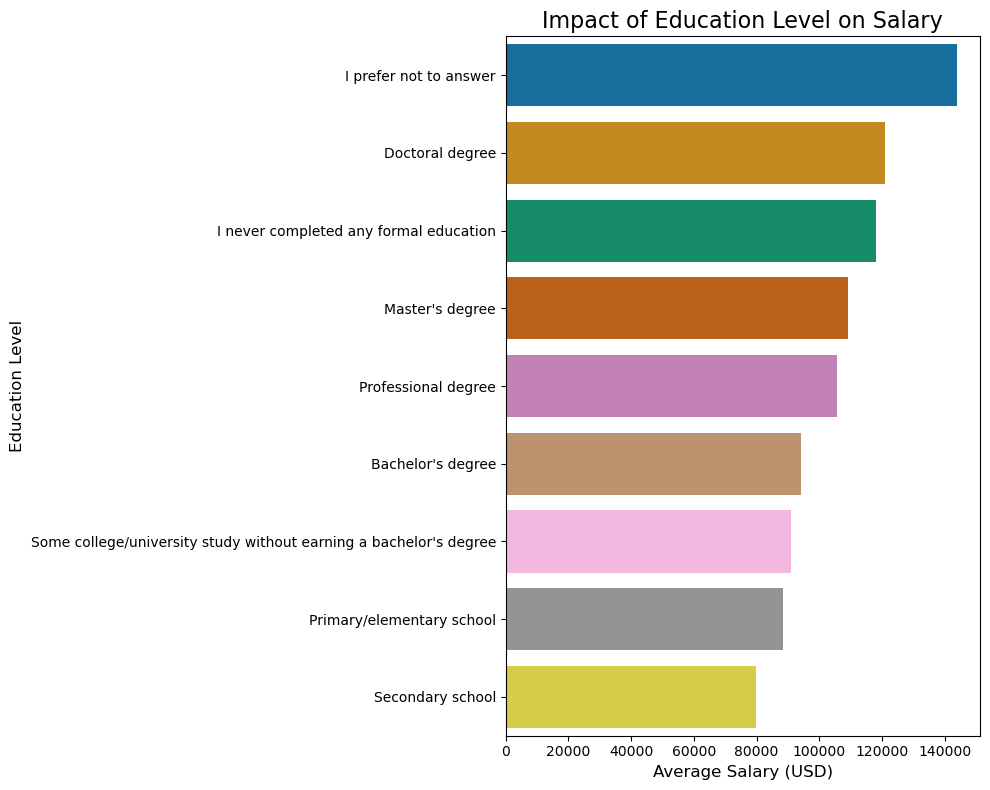

In [253]:
# Group by FormalEducation and calculate mean salary
salary_by_education = salary_data_us.groupby('FormalEducation')['Salary'].mean().reset_index()

# Sort by salary to display highest to lowest
salary_by_education_sorted = salary_by_education.sort_values(by='Salary', ascending=False)

# Use Seaborn 'colorblind' palette to ensure accessibility for color vision deficiencies
plot_salary_comparison(salary_by_education_sorted, 
                       x_col='Salary', 
                       y_col='FormalEducation', 
                       title='Impact of Education Level on Salary', 
                       xlabel='Average Salary (USD)', 
                       ylabel='Education Level', 
                       palette='colorblind')  # Using 'colorblind' palette for accessibility

This bar chart illustrates the impact of **education level** on **average salary** among developers. Those with higher educational qualifications, such as **Doctoral** and **Master's degrees**, tend to earn higher salaries, averaging over $100,000 annually. Notably, individuals who never completed any formal education also report relatively high average salaries, exceeding those of Bachelor's degree holders. In contrast, developers with only **Secondary school** education report the lowest average salaries, highlighting the correlation between formal education and compensation. However, the variation in salaries across educational levels suggests that factors beyond formal education may influence earnings potential in the tech industry.

### Research Question 4: Is there a relationship between salary and job satisfaction for Male and Female developers?

In [254]:

# Analyze the relationship between salary and job satisfaction by JobTitle and Gender
salary_vs_job_satisfaction = salary_data_us.groupby(['JobTitle', 'Gender'])[['Salary', 'JobSatisfaction']].mean()

# Reset the index to bring 'JobTitle' and 'Gender' back as columns
salary_vs_job_satisfaction = salary_vs_job_satisfaction.reset_index()

# Drop rows where 'Salary' is NaN
salary_vs_job_satisfaction_cleaned = salary_vs_job_satisfaction.dropna(subset=['Salary'])

# Use the format_and_sort_salary function, sorting by JobTitle and Gender
salary_vs_job_satisfaction_sorted = format_and_sort_salary(salary_vs_job_satisfaction_cleaned, sort_by=['JobTitle', 'Gender'], ascending=[True, True])

# Display the formatted and sorted DataFrame
salary_vs_job_satisfaction_sorted
    

,JobTitle,Gender,Salary,JobSatisfaction
4,Data scientist,Female,"$91,375.00",7.794118
5,Data scientist,Male,"$98,509.26",7.226950
6,Database administrator,Female,"$66,500.00",6.142857
7,Database administrator,Male,"$110,005.56",7.500000
10,Desktop applications developer,Female,"$73,023.08",7.464286
11,Desktop applications developer,Male,"$93,132.67",7.182432
12,DevOps specialist,Female,"$124,750.00",8.400000
13,DevOps specialist,Male,"$101,490.00",7.000000
14,Developer with a statistics or mathematics bac...,Female,"$102,450.18",6.904762
15,Developer with a statistics or mathematics bac...,Male,"$108,700.76",7.284916


The results provide insights into the relationship between salary and job satisfaction across different job titles and genders. For instance, ***Data Scientists*** exhibit a significant salary difference, with females earning an average of 91,375 compared to males earning 98,509. Despite this gap, females report higher job satisfaction (7.79) compared to their male counterparts (7.23). This trend of higher female job satisfaction despite lower salaries is also visible in roles such as ***DevOps Specialist*** and ***Desktop Applications Developer***.

Additionally, job titles like ***Mobile Developer*** and ***Machine Learning Specialist*** show relatively high average salaries for both males and females, with both roles seeing salaries over 100,000 on average. Interestingly, while males in these roles tend to report slightly higher satisfaction scores, the differences in job satisfaction between genders are generally not as pronounced as the salary disparities. These findings suggest that while salary differences persist across genders, job satisfaction remains relatively high for both groups in technical roles. However, the higher satisfaction reported by women in some lower-paid roles could point to factors beyond compensation, such as work-life balance or job environment, playing a significant role in overall job fulfillment.

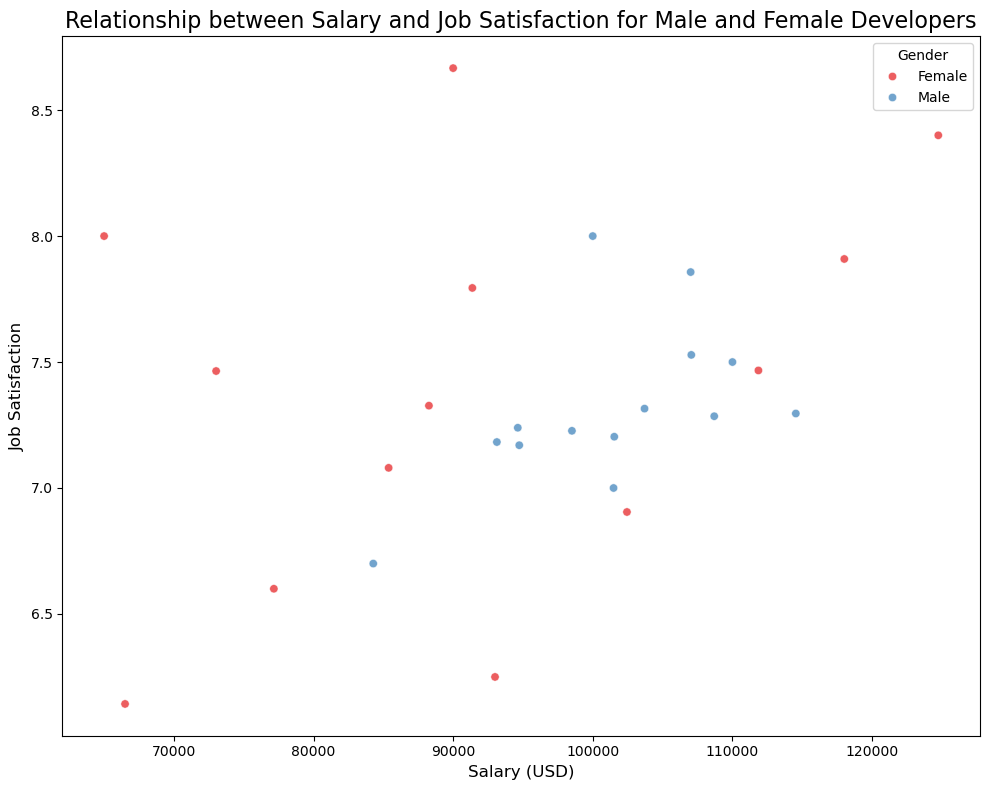

In [255]:

plot_salary_vs_satisfaction(salary_vs_job_satisfaction_cleaned, title='Relationship between Salary and Job Satisfaction for Male and Female Developers', palette='Set1')

This scatter plot visualizes the relationship between **salary** and **job satisfaction** for Male (blue) and Female (red) developers. The x-axis represents salary (USD), and the y-axis reflects job satisfaction (0-10). The data shows no strong linear correlation between salary and satisfaction for either gender. Satisfaction levels vary widely across salary brackets, with clusters of developers earning between 90,000 and 110,000 reporting moderate satisfaction (7-8). Notably, some developers earning less than 80,000 report high satisfaction, while others with higher salaries have more modest satisfaction levels. This suggests that factors beyond salary, such as work-life balance or company culture, may play a role in job satisfaction.

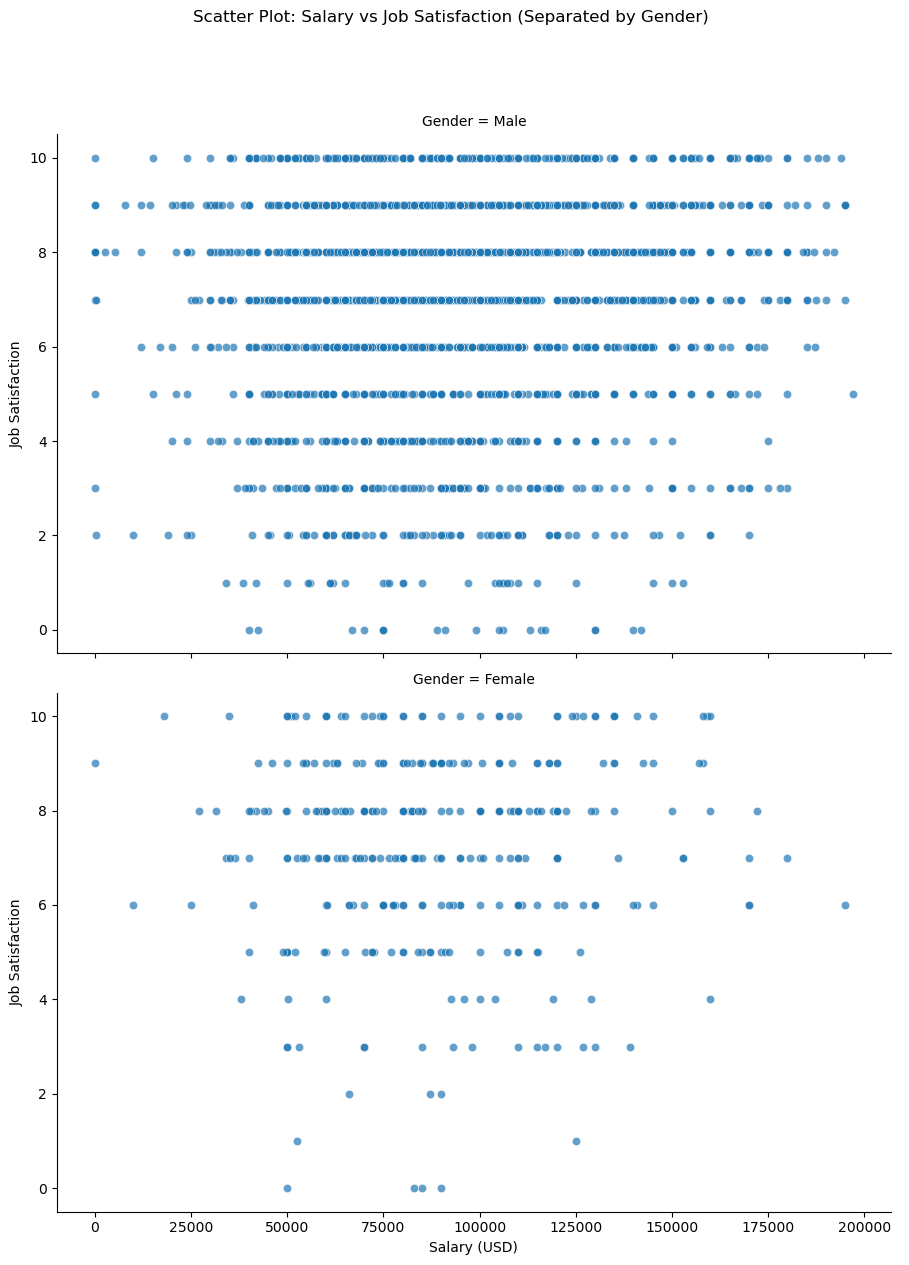

In [256]:
g = sns.FacetGrid(salary_data_us, row='Gender', height=6, aspect=1.5)  # Use 'row' instead of 'col' for vertical stacking
g.map(sns.scatterplot, 'Salary', 'JobSatisfaction', alpha=0.7)
g.add_legend()
g.set_axis_labels('Salary (USD)', 'Job Satisfaction')
plt.suptitle('Scatter Plot: Salary vs Job Satisfaction (Separated by Gender)', y=1.05)
plt.tight_layout()
plt.show()

These two scatter plots illustrate the relationship between ***salary*** and ***job satisfaction*** for Male and Female developers. The Male developers’ plot shows a broad distribution across salary ranges, with notable clustering of satisfaction levels around 7 and 8, even for salaries exceeding 100,000. Female developers display a similar pattern but with fewer high earners and more variation in job satisfaction across salary bands, particularly around the 50,000 to 100,000 range. Both genders show high satisfaction (8-10) across various salary levels, indicating that salary alone may not fully explain job satisfaction. Interestingly, satisfaction ratings for Female developers are more dispersed, with a wider spread across different satisfaction levels, especially below 100,000, suggesting that non-salary factors might play a more significant role for them.

## Conclusion

The findings highlight key insights into the disparities in developer salaries based on gender, education level, and job satisfaction. Across different job titles, male developers tend to earn higher average salaries compared to their female counterparts. Additionally, the impact of education level on salary is evident, with higher educational qualifications generally leading to higher compensation. The relationship between salary and job satisfaction, when analyzed for male and female developers separately, shows no clear trend, indicating that salary alone may not be the sole driver of job satisfaction. Overall, the results provide a nuanced view of how various factors interplay to shape the experiences and compensation of developers in the tech industry.

In [257]:
!jupyter nbconvert --to html stack_overflow_complete_analysis.ipynb

[NbConvertApp] Converting notebook stack_overflow_complete_analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 821507 bytes to stack_overflow_complete_analysis.html
